## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Federico Gercensztein
***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


<div class="alert alert-block alert-warning">
<img src="./ojo.svg" align="left" width="50" />  Normalice la amplitud máxima de todas las ventanas a 0 dB.
</div>

In [1]:
## Inicialización del Notebook del TP2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

# Insertar aquí el código para inicializar tu notebook
########################################################
import numpy as np
from numpy.fft import fft, fftshift
import scipy.signal as sig

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'Modulo normalizado [dB]')

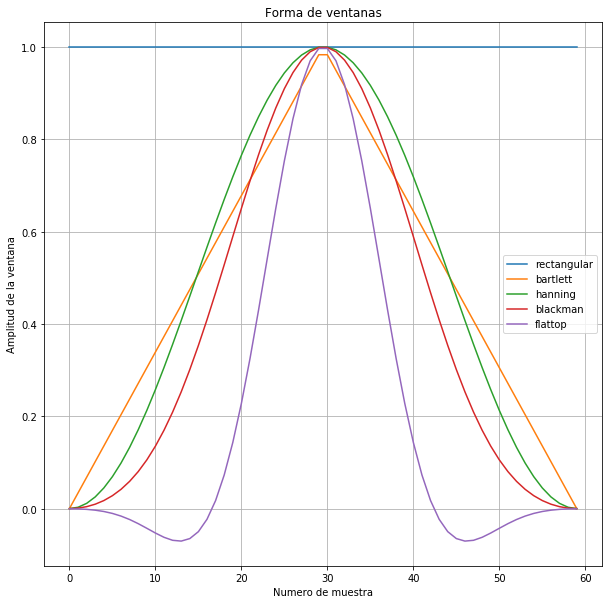

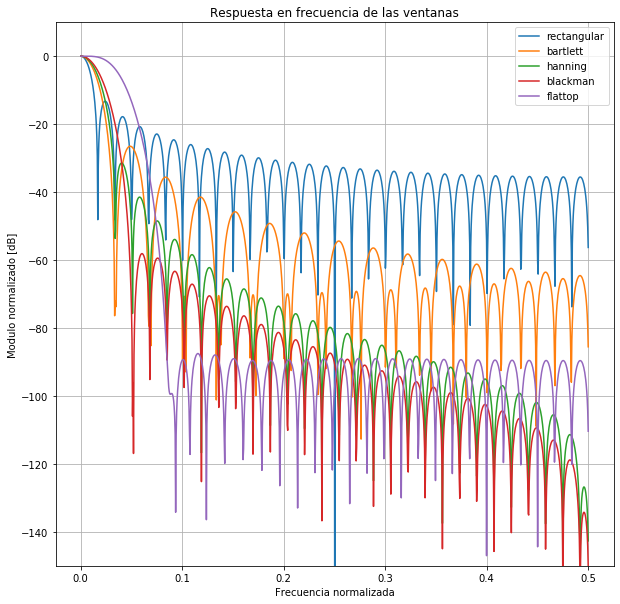

In [2]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
N = 60 # muestras
fftSize = 2048

ventanas = [sig.boxcar(N), sig.bartlett(N), sig.hann(N), sig.blackman(N), sig.flattop(N)]
ventanas_names = ["rectangular", "bartlett", "hanning", "blackman", "flattop"]
V = len(ventanas_names)
plt.figure("Ventanas", figsize = (10,10))

for (vv, this_win) in zip(ventanas_names, ventanas):
       plt.plot(this_win, label=vv)
plt.legend()
plt.grid()       
plt.xlabel("Numero de muestra")
plt.ylabel("Amplitud de la ventana")
plt.title("Forma de ventanas")


complexMat = np.transpose(np.vstack([fft(thisWin,fftSize, axis=0) for thisWin in ventanas]))
#fft(signal, size) Si size > len(signal) la FFT le hace zero padding automaticamente :)
moduleMat = np.abs(complexMat)
for ii in range (V):
       moduleMat[:,ii] = moduleMat[:,ii] / np.max(moduleMat[:,ii])
#Aplico un fftshift para que quede centrada en el 0, y obtengo el modulo del resultado
freq = np.linspace(-0.5, 0.5, len(moduleMat[:,0]))

#Genero el vector de frecuencias normalizadas, entre -0.5 y 0.5 de longitud de mi vector
response = 20*np.log10(moduleMat)
#Escalo a dB
response = np.clip(response, -200, 10)
#Recorto valores por debajo de los -200dB
plt.figure("Modulo de las ventanas", figsize = (10,10))
plt.title("Respuesta en frecuencia de las ventanas")

lim = int(np.floor(fftSize/2))
response = response[0:lim, :]
freq = freq[lim:fftSize]

BW = np.zeros(V)
for ii in range (V):
       plt.plot(freq, response[:,ii], label=ventanas_names[ii])
#       Obtengo los anchos de banda buscando los valores menores al max*raiz(2)/2
#       Y luego me quedo con el primer elemento, por eso el [0][0]
       BW[ii] = np.where(moduleMat[:,ii] <= np.max(moduleMat[:,ii])*np.sqrt(2)/2)[0][0]
       BW[ii] = freq[int(BW[ii])]

plt.legend()
plt.grid()
plt.ylim(-150,10)
plt.xlabel("Frecuencia normalizada")
plt.ylabel("Modulo normalizado [dB]")  
  

b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [3]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [round(BW[0], 4), '-14dB'], # <-- acá debería haber numeritos :)
                   [round(BW[1], 4), '-27dB'], # <-- acá debería haber numeritos :)
                   [round(BW[2], 4), '-32dB'], # <-- acá debería haber numeritos :)
                   [round(BW[3], 4), '-58dB'], # <-- acá debería haber numeritos :)
                   [round(BW[4], 4), '-90dB'] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$f_1$ (#),$W_2$ (dB)
Rectangular,0.0081,-14dB
Bartlett,0.0115,-27dB
Hann,0.0129,-32dB
Blackman,0.0144,-58dB
Flat-top,0.0320,-90dB


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

Text(0, 0.5, 'Amplitud en dB')

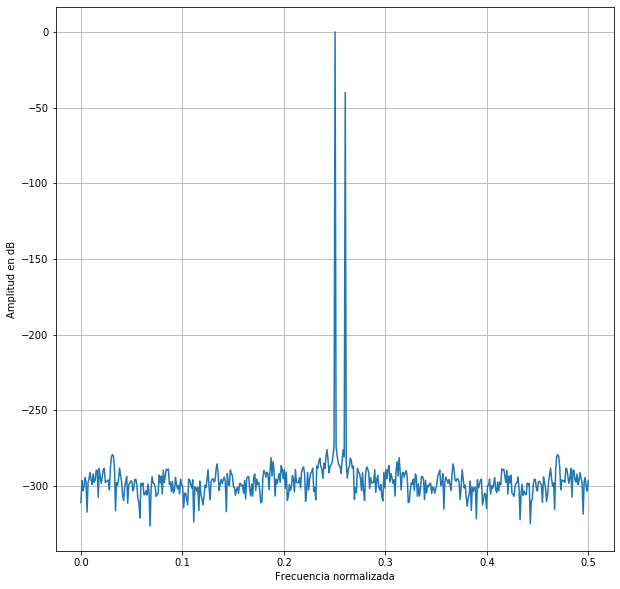

In [4]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
N = 1000
fs = 1000
Ts = 1/fs

tt = np.linspace(0, (N-1)*Ts, N)

f1 = fs/4
f2 = f1 + (10*fs/N)

a2 = 10**(-40/20)

x1 = np.sin(2*np.pi*f1*tt)
x2 = a2*np.sin(2*np.pi*f2*tt)

x = x1 + x2

X = fft(x)
modX = np.abs(fftshift(X))*2/N
center = int(np.floor(N/2))
modX = modX[center:N]
modX = 20*np.log10(modX)
freq = np.linspace(0, 0.5, len(modX))
plt.figure("Modulo bitonal", figsize=(10,10))
plt.plot(freq, modX)
plt.grid()
plt.xlabel("Frecuencia normalizada")
plt.ylabel("Amplitud en dB")

<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El factor de escala mínimo para este caso se encuentra en el piso de ruido, para estas condiciones está un poco por debajo de -250dB
</div>

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Para medir $x_2$ debemos tener en cuenta la ventana que estamos usando, en este caso rectangular. Esta ventana que estamos usando nos modifica el espectro de nuestra señal (modulo y fase), y esto puede modificar la energía total de la señal (podría hacer que nuestra señal entre en el piso de ruido) o bien que se solape con el tono aledaño.
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Para un ADC de 16 se tendrían los siguientes datos: $\Delta$ = $\frac{R}{L}$ con $R = 1V$ y $L = 2^{16}$ <br>
    Por lo que $\Delta$ = 1.525e-05, y el ruido de cuantización $\frac{\Delta^2}{12}$ = 1.27e-6 = -8.02dB <br>
    Este resultado es súmamente importante ya que el ruido de cuantización nos delimita el valor mínimo que puede tener nuestra señal $x_2$ en una determinada frecuencia, es decir que la amplitud $a_2$ no puede ser menor a -8dB ya que sino se perdería con el ruido de cuantización. La diferencia en base al resultado anterior es realmente enorme, dónde habíamos calculado que $x_2$ podía tomar valores de hasta -250dB ahora sólo hasta -8dB, 242dB de diferencia!
</div>

Text(0, 0.5, 'Amplitud en dB')

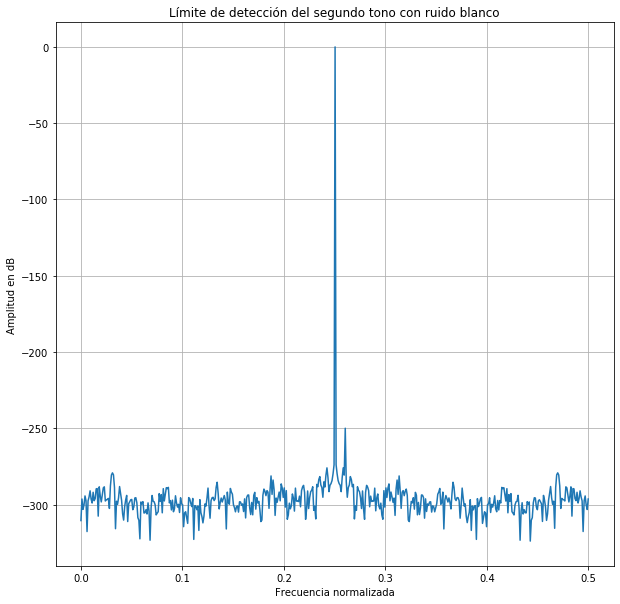

In [5]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
N = 1000
fs = 1000
Ts = 1/fs

tt = np.linspace(0, (N-1)*Ts, N)

f1 = fs/4
f2 = f1 + (10*fs/N)

a2 = 10**(-250/20)

x1 = np.sin(2*np.pi*f1*tt)
x2 = a2*np.sin(2*np.pi*f2*tt)

x = x1 + x2

X = fft(x)
modX = np.abs(fftshift(X))*2/N
center = int(np.floor(N/2))
modX = modX[center:N]
modX = 20*np.log10(modX)
freq = np.linspace(0, 0.5, len(modX))
plt.figure("Modulo bitonal", figsize=(10,10))
plt.title("Límite de detección del segundo tono con ruido blanco")
plt.plot(freq, modX)
plt.grid()
plt.xlabel("Frecuencia normalizada")
plt.ylabel("Amplitud en dB")

<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

,$a_2$ (dB)
leve,-25.50
moderada,-28.15
máxima,-30.50


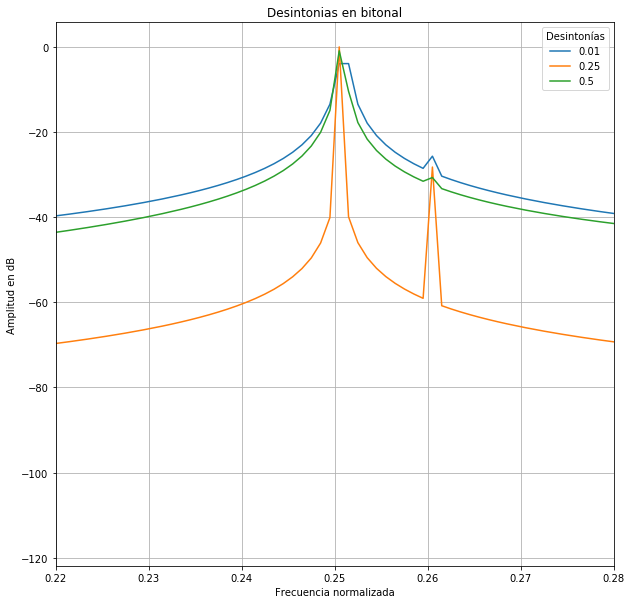

In [6]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
N = 1000
fs = 1000
Ts = 1/fs

tt = np.linspace(0, (N-1)*Ts, N)
d = np.asarray([0.01, 0.25, 0.5])

f1 = fs/4 + (d*fs/N)
f2 = [fs/4 + (10*fs/N), fs/4 + (10*fs/N), fs/4 + (10*fs/N)]

a2dB = -28
a2 = 10**(a2dB/20)

x1 = np.transpose(np.vstack([np.sin(2*np.pi*fi*tt) for fi in f1]))
x2 = np.transpose(np.vstack([a2*np.sin(2*np.pi*fi*tt) for fi in f2]))

x = x1 + x2

X = fft(x, axis=0)
modX = np.abs(fftshift(X))*2/N
center = int(np.floor(N/2))
modX = modX[center:N]
modX = 20*np.log10(modX)
freq = np.linspace(0, 0.5, len(modX))
plt.figure("Modulo bitonal", figsize=(10,10))
plt.plot(freq, modX)
plt.grid()
plt.xlabel("Frecuencia normalizada")
plt.ylabel("Amplitud en dB")
plt.title("Desintonias en bitonal")
plt.xlim(0.22,0.28)
plt.legend(d, title="Desintonías")


#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   -25.5, # <-- acá debería haber numeritos :)
                   -28.15, # <-- acá debería haber numeritos :)
                   -30.5 # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

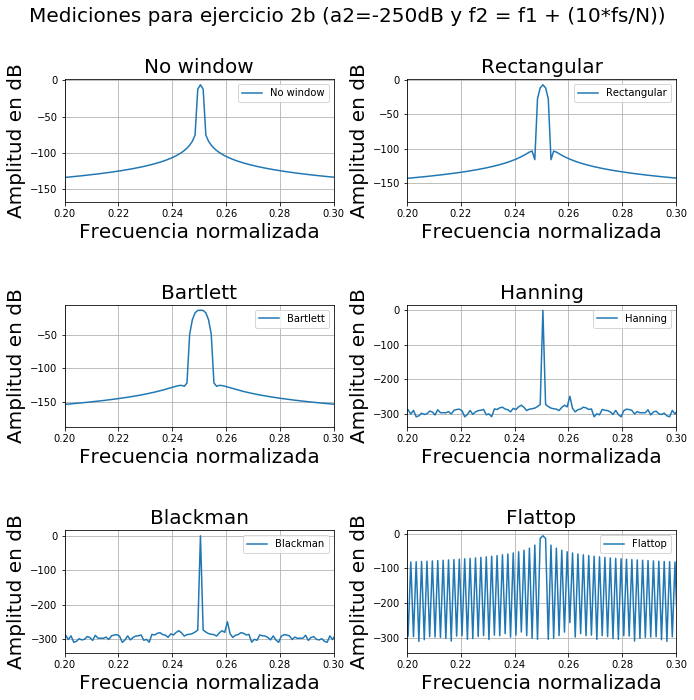

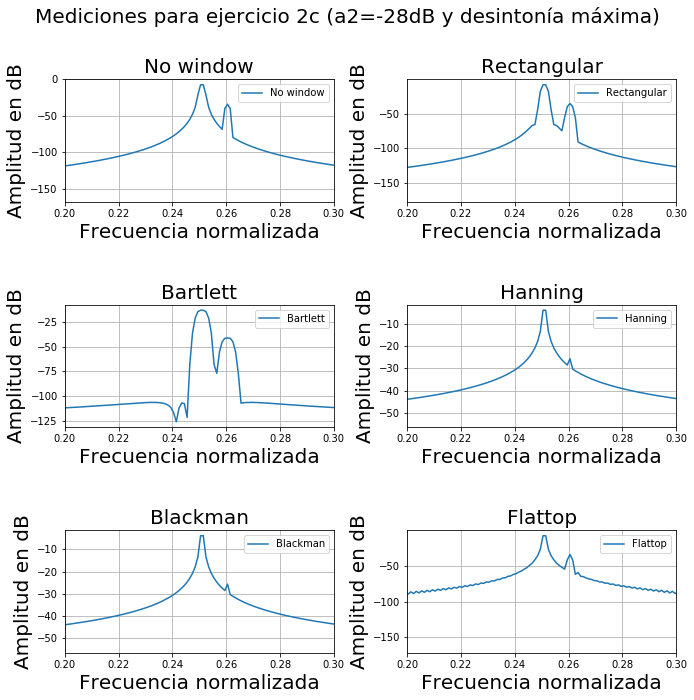

In [7]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
##########################################
# Para 2.b) #
##########################################
N = 1000
fs = 1000
Ts = 1/fs

tt = np.linspace(0, (N-1)*Ts, N)

ventanas = [1, sig.boxcar(N), sig.bartlett(N), sig.hann(N), sig.blackman(N), sig.flattop(N)]
ventanas_names = ["No window", "Rectangular", "Bartlett", "Hanning", "Blackman", "Flattop"]
V = len(ventanas_names)

f1 = fs/4
f2 = f1 + (10*fs/N)

a2dB = -250
a2 = 10**(a2dB/20)

x1 = np.sin(2*np.pi*f1*tt)
x2 = a2*np.sin(2*np.pi*f2*tt)

x = x1 + x2

xw = np.transpose(np.vstack([x * this_win for this_win in ventanas]))

X = fft(xw, axis=0)
modX = np.abs(fftshift(X))*2/N
center = int(np.floor(N/2))
modX = modX[center:N]
modX = 20*np.log10(modX)
freq = np.linspace(0, 0.5, len(modX))
plt.figure("Modulo bitonal", figsize=(10,10))
plt.suptitle('Mediciones para ejercicio 2b (a2=-250dB y f2 = f1 + (10*fs/N))', fontsize=20)
for ii in range (V):
       plt.subplot(3,2,ii+1)
       plt.tight_layout(pad=2, w_pad=0.5, h_pad=5)
       plt.plot(freq, modX[:, ii], label=ventanas_names[ii])
       plt.title(ventanas_names[ii], fontsize=20)
       plt.xlim(0.2, 0.3)
       plt.xlabel("Frecuencia normalizada", fontsize=20)
       plt.ylabel("Amplitud en dB", fontsize=20)
       plt.legend()
       plt.grid()
plt.subplots_adjust(top=0.88)
##########################################
# Para 2.c) #
##########################################
f1 = fs/4 + (0.5*fs/N)
f2 = fs/4 + (10*fs/N)

a2dB = -28
a2 = 10**(a2dB/20)

x1 = np.sin(2*np.pi*f1*tt)
x2 = a2*np.sin(2*np.pi*f2*tt)

x = x1 + x2

xw = np.transpose(np.vstack([x*this_win for this_win in ventanas]))

X = fft(xw, axis=0)
modX = np.abs(fftshift(X))*2/N
center = int(np.floor(N/2))
modX = modX[center:N]
modX = 20*np.log10(modX)
freq = np.linspace(0, 0.5, len(modX))
plt.figure("Modulo bitonal 2c", figsize=(10,10))
plt.suptitle('Mediciones para ejercicio 2c (a2=-28dB y desintonía máxima)', fontsize=20)
for ii in range (V):
       plt.subplot(3,2,ii+1)
       plt.tight_layout(pad=2, w_pad=0.5, h_pad=5)
       plt.plot(freq, modX[:, ii], label=ventanas_names[ii])
       plt.title(ventanas_names[ii], fontsize=20)
       plt.xlim(0.2, 0.3)
       plt.xlabel("Frecuencia normalizada", fontsize=20)
       plt.ylabel("Amplitud en dB", fontsize=20)
       plt.legend()
       plt.grid()
plt.subplots_adjust(top=0.88)

In [8]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['No figura', '-35.5'], # <-- acá debería haber numeritos :)
                   ['No figura', '-41.28'], # <-- acá debería haber numeritos :)
                   ['-250dB', '-25.65'], # <-- acá debería haber numeritos :)
                   ['-250dB', '-25.6'], # <-- acá debería haber numeritos :)
                   ['No figura', '-34'] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,No figura,-35.5
Bartlett,No figura,-41.28
Hann,-250dB,-25.65
Blackman,-250dB,-25.6
Flat-top,No figura,-34


<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

In [9]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   "$\cong$ " + '0.8*fs/N', # <-- acá debería haber numeritos :)
                   "$\cong$ " + '0.8*fs/N', # <-- acá debería haber numeritos :)
                   "$\cong$ " + '0.85*fs/N' , # <-- acá debería haber numeritos :)
                   "$\cong$ " + '0.85*fs/N', # <-- acá debería haber numeritos :)
                   "$\cong$ " + '0.9*fs/N' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$\Omega_0$ (#)
Rectangular,$\cong$ 0.8*fs/N
Bartlett,$\cong$ 0.8*fs/N
Hann,$\cong$ 0.85*fs/N
Blackman,$\cong$ 0.85*fs/N
Flat-top,$\cong$ 0.9*fs/N


<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

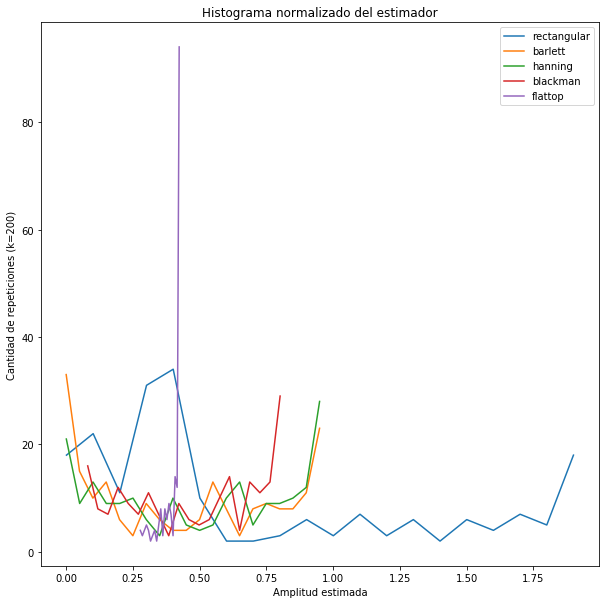

In [10]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
N  = 1000 # muestras
fs = 1000 # Hz

k = 200 #Repeticiones de montecarlo

f0 = fs/4
p0 = 0     # radianes
a0 = 2      # Volts

df = np.random.uniform(-2,2, k)
fn = f0 + df*fs/N

Ts = 1/fs
tt = np.linspace(0, (N-1)*Ts, N)

x = np.transpose(np.vstack([a0*np.sin(2*np.pi*ff*tt) for ff in fn]))

ventana = [sig.boxcar(N), sig.bartlett(N), sig.hann(N), sig.blackman(N), sig.flattop(N)]

V = len(ventana)
sesgo = np.zeros(V)
var = np.zeros(V)
prom = np.zeros(V)
dist = np.zeros((k,V))

for (vv, this_win) in zip(range(V), ventana):
       X = np.transpose(np.vstack([x[:,kk]*this_win for kk in range(0,k)]))
       X = fft(X, axis=0)
       modX = np.abs(fftshift(X))*2/N
       center = int(np.floor(N/2))
       modX = modX[center:N]
       freq = np.linspace(0, 0.5, len(modX))
       mod_slice = modX[250, :]
       dist[:,vv] = mod_slice
       prom[vv] = np.mean(mod_slice)
       sesgo[vv] = prom[vv] - a0
       var[vv] = np.mean((mod_slice-prom[vv])**2)
       
s1, edge1 = np.histogram(dist[:,0], 20)
s2, edge2 = np.histogram(dist[:,1], 20)
s3, edge3 = np.histogram(dist[:,2], 20)
s4, edge4 = np.histogram(dist[:,3], 20)
s5, edge5 = np.histogram(dist[:,4], 20)


plt.figure("Histograma normalizado del estimador", figsize=(10,10))
plt.title("Histograma normalizado del estimador")
plt.plot(edge1[0:20], s1, label="rectangular")  
plt.plot(edge2[0:20], s2, label="barlett")  
plt.plot(edge3[0:20], s3, label="hanning")  
plt.plot(edge4[0:20], s4, label="blackman")  
plt.plot(edge5[0:20], s5, label="flattop")  
plt.xlabel("Amplitud estimada")
plt.ylabel("Cantidad de repeticiones (k=200)")

plt.legend()

In [11]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [sesgo[0], var[0]], # <-- acá debería haber numeritos :)
                   [sesgo[1], var[1]], # <-- acá debería haber numeritos :)
                   [sesgo[2], var[2]], # <-- acá debería haber numeritos :)
                   [sesgo[3], var[3]], # <-- acá debería haber numeritos :)
                   [sesgo[4], var[4]], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-1.259061,0.407274
Bartlett,-1.534512,0.125243
Hann,-1.479350,0.115099
Blackman,-1.500005,0.062850
Flat-top,-1.603989,0.001938


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

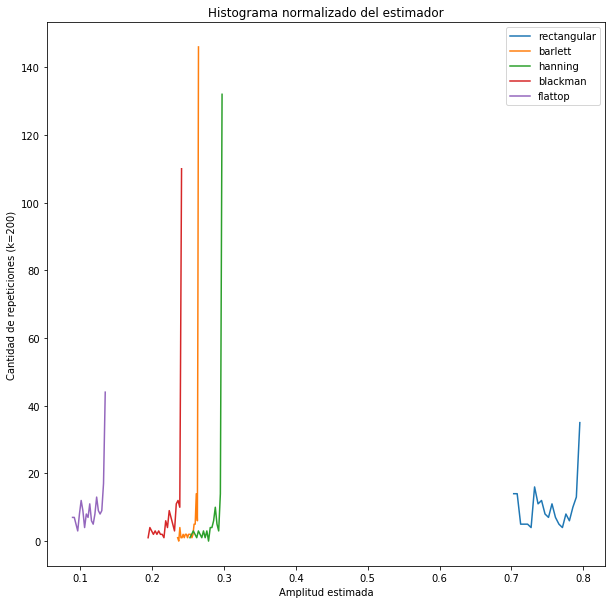

In [12]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
N  = 1000 # muestras
fs = 1000 # Hz

k = 200 #Repeticiones de montecarlo

f0 = fs/4
p0 = 0     # radianes
a0 = 2      # Volts

df = np.random.uniform(-2,2, k)
fn = f0 + df*fs/N

Ts = 1/fs
tt = np.linspace(0, (N-1)*Ts, N)

x = np.transpose(np.vstack([a0*np.sin(2*np.pi*ff*tt) for ff in fn]))

ventana = [sig.boxcar(N), sig.bartlett(N), sig.hann(N), sig.blackman(N), sig.flattop(N)]

V = len(ventana)
sesgo = np.zeros(V)
var = np.zeros(V)
prom = np.zeros(V)

dist = np.zeros((k,V))

for (vv, this_win) in zip(range(V), ventana):
       X = np.transpose(np.vstack([x[:,kk]*this_win for kk in range(0,k)]))
       X = fft(X, axis=0)
       modX = np.abs(fftshift(X))*2/N
       center = int(np.floor(N/2))
       modX = modX[center:N]
       freq = np.linspace(0, 0.5, len(modX))
       mod_slice = modX[248:253, :]**2
       mod_slice = np.mean(mod_slice, axis=0)
       dist[:,vv] = mod_slice
       prom[vv] = np.mean(mod_slice)
       sesgo[vv] = prom[vv] - a0
       var[vv] = np.mean((mod_slice-prom[vv])**2)
       
s1, edge1 = np.histogram(dist[:,0], 20)
s2, edge2 = np.histogram(dist[:,1], 20)
s3, edge3 = np.histogram(dist[:,2], 20)
s4, edge4 = np.histogram(dist[:,3], 20)
s5, edge5 = np.histogram(dist[:,4], 20)


plt.figure("Histograma normalizado del estimador", figsize = (10,10))
plt.title("Histograma normalizado del estimador")
plt.plot(edge1[0:20], s1, label="rectangular")  
plt.plot(edge2[0:20], s2, label="barlett")  
plt.plot(edge3[0:20], s3, label="hanning")  
plt.plot(edge4[0:20], s4, label="blackman")  
plt.plot(edge5[0:20], s5, label="flattop")  
plt.xlabel("Amplitud estimada")
plt.ylabel("Cantidad de repeticiones (k=200)")

plt.legend()


In [13]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                  [sesgo[0], var[0]], # <-- acá debería haber numeritos :)
                   [sesgo[1], var[1]], # <-- acá debería haber numeritos :)
                   [sesgo[2], var[2]], # <-- acá debería haber numeritos :)
                   [sesgo[3], var[3]], # <-- acá debería haber numeritos :)
                   [sesgo[4], var[4]], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-1.243570,0.001006
Bartlett,-1.737022,0.000040
Hann,-1.706246,0.000119
Blackman,-1.765084,0.000157
Flat-top,-1.880604,0.000223
